In [1]:
import pandas as pd
import keras
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

Using TensorFlow backend.


,data1,data2,key1,key2
0,-0.523427,1.314346,a,one
1,-1.361782,1.019599,a,two
2,-0.786113,0.801612,b,one
3,-0.444202,-0.998488,b,two
4,-0.380010,2.069022,a,one


(-0.5, 63.5, 63.5, -0.5)

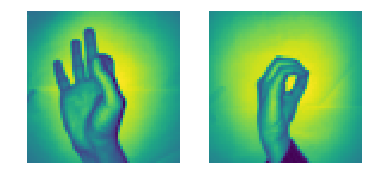

In [20]:
import matplotlib.pyplot as plt


x_l = np.load('X.npy')
y_l = np.load('Y.npy')

plt.subplot(1,2,1)
plt.imshow(x_l[0].reshape((64,64)))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[300].reshape((64,64)))
plt.axis('off')         

In [3]:
print(x_l.shape)


y_l = np.argmax(y_l,axis = 1)

print(x_l)
print(y_l)

x_l = x_l.reshape(x_l.shape[0],64,64,1)

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x_l,y_l,random_state = 40,test_size = 0.2)
no_of_train = X_train.shape[0]
no_of_test = X_test.shape[0]

print('{}\n{}\n'.format(no_of_train,no_of_test))
print(x_l.shape)


(2062, 64, 64)
[[[ 0.46666667  0.47450981  0.47843137 ...,  0.51764709  0.51372552
    0.50196081]
  [ 0.49803922  0.48627451  0.48627451 ...,  0.52549022  0.51764709
    0.50980395]
  [ 0.54509807  0.49411765  0.49019608 ...,  0.52941179  0.52549022
    0.51372552]
  ..., 
  [ 0.50196081  0.51372552  0.51764709 ...,  0.5529412   0.54509807
    0.53333336]
  [ 0.49803922  0.50588238  0.51372552 ...,  0.54509807  0.53333336
    0.52156866]
  [ 0.49019608  0.49803922  0.50196081 ...,  0.52941179  0.52156866
    0.50980395]]

 [[ 0.59607846  0.60784316  0.61960787 ...,  0.4627451   0.4509804
    0.44313726]
  [ 0.60784316  0.61960787  0.63137257 ...,  0.47450981  0.4627451
    0.4509804 ]
  [ 0.6156863   0.627451    0.64313728 ...,  0.48627451  0.47450981
    0.4627451 ]
  ..., 
  [ 0.50980395  0.51764709  0.52549022 ...,  0.40392157  0.39607844
    0.3882353 ]
  [ 0.50196081  0.50980395  0.51764709 ...,  0.40000001  0.39215687
    0.38431373]
  [ 0.49411765  0.50588238  0.50980395 ...,  

In [4]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential, load_model, Model
from keras.layers import Input, BatchNormalization
from keras.layers import Dense, LSTM, GlobalAveragePooling1D, GlobalAveragePooling2D,Dropout
from keras.layers import Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
def build_classifier(x):
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(512, activation = 'tanh', input_dim = x*x))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(512,activation = 'tanh'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(10,activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier
    
    
# model = build_classifier(X_train.shape[1])

# model.summary()

# model.fit(x = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]),y = keras.utils.to_categorical(Y_train, num_classes=10)
# ,batch_size=16,epochs=30,validation_split=0.2, verbose=1)


In [5]:

#model.evaluate(x=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]), y=keras.utils.to_categorical(Y_test, num_classes=10), verbose=1)


In [6]:

# y_test_predict = np.argmax(model.predict(x=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]), verbose=1),axis = 1)

# print('\n',y_test_predict)

# print(Y_test)

# print("Test accuracy : {}%".format(np.sum(y_test_predict == Y_test)/(no_of_test)))


In [7]:
def conv_classifier(a):    
    model_input = Input(shape=(a, a,1))
    
    # Define a model architecture
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(model_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)       
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)    
    x = Dropout(0.25)(x)
    
    y1 = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=model_input, outputs= y1)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    return model

In [8]:
model = conv_classifier(X_train.shape[1])

model.summary()
print(X_train.shape)

history = model.fit(x = X_train,y = keras.utils.to_categorical(Y_train, num_classes=10),batch_size=16,epochs=30,validation_split=0.2, verbose=1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
__________

413/413 [==============================] - 0s     
[0.2605993310418025, 0.95157385146646756]

 [3 8 1 5 8 9 5 4 5 4 2 0 1 2 2 3 0 1 3 3 1 8 3 7 0 2 0 5 5 5 2 6 9 3 8 5 6
 2 3 0 3 1 2 8 2 6 8 1 6 0 6 5 4 0 9 0 7 8 8 1 8 7 8 9 2 4 7 3 0 1 8 4 7 4
 6 6 8 2 9 3 6 7 8 3 7 7 6 7 1 6 3 9 6 8 2 3 8 5 5 6 1 6 6 3 5 3 1 3 2 4 1
 7 6 1 5 5 1 0 7 3 4 2 0 3 4 0 5 4 7 0 5 3 7 0 0 1 0 5 8 4 1 6 5 8 6 7 0 1
 3 4 4 9 8 4 5 4 0 5 0 9 2 5 6 2 9 1 6 2 3 4 8 8 0 1 7 0 1 1 6 8 7 4 0 6 6
 8 9 1 2 9 6 9 8 2 2 3 8 4 3 5 9 3 5 6 4 8 6 2 1 3 0 8 3 3 0 4 6 0 6 2 0 8
 4 1 5 5 9 2 5 2 2 8 3 7 5 9 2 3 7 6 6 5 4 9 2 3 4 0 5 5 3 0 3 9 0 6 6 3 4
 2 1 7 7 7 4 2 7 2 1 4 7 1 2 9 3 5 2 4 2 0 9 5 5 0 0 8 3 9 8 8 6 7 6 1 7 2
 4 5 3 3 3 0 8 8 4 1 1 0 5 1 0 3 8 7 5 5 8 9 2 3 0 2 7 2 6 9 0 5 0 8 3 3 8
 0 0 1 3 4 0 9 2 5 0 5 3 6 2 4 2 3 0 6 7 3 3 6 2 3 0 5 4 6 6 6 7 5 2 0 2 8
 5 8 1 8 2 4 7 2 5 5 1 9 1 7 5 0 1 3 3 7 9 8 5 0 4 1 8 9 4 4 1 1 9 8 3 7 0
 5 7 7 8 3 8]
[3 8 1 5 8 9 5 4 5 4 2 0 1 2 2 6 6 1 3 3 1 8 3 7 0 2 7 5 5 5 2 6 9

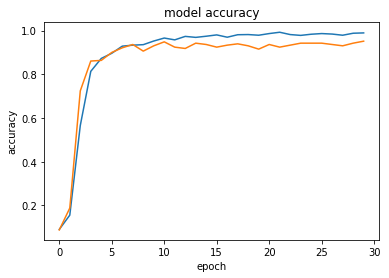

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

print(model.evaluate(x=X_test, y=keras.utils.to_categorical(Y_test, num_classes=10), verbose=1))

y_test_predict = np.argmax(model.predict(x=X_test),axis = 1)

print('\n',y_test_predict)

print(Y_test)

print("Test accuracy : {}%".format(np.sum(y_test_predict == Y_test)/(no_of_test)))

In [10]:
import cv2

print(cv2.__version__)


3.3.1


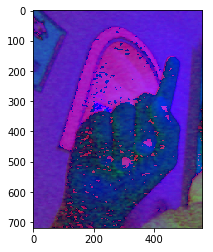

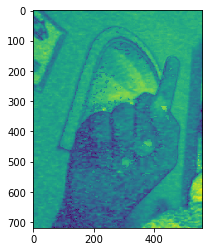

(719, 592)


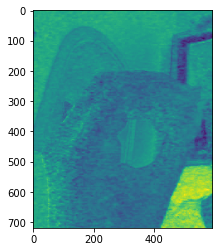

(64, 64)


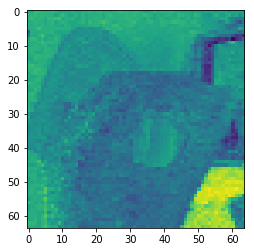

[[ 0.56470588  0.56078431  0.58823529 ...,  0.54509804  0.54509804
   0.54117647]
 [ 0.57254902  0.57647059  0.58823529 ...,  0.54901961  0.50196078
   0.5372549 ]
 [ 0.57647059  0.59215686  0.56862745 ...,  0.46666667  0.4627451
   0.45098039]
 ..., 
 [ 0.56078431  0.56078431  0.57647059 ...,  0.49019608  0.44313725
   0.51372549]
 [ 0.59607843  0.58039216  0.57647059 ...,  0.44705882  0.49019608
   0.45882353]
 [ 0.58039216  0.56470588  0.56078431 ...,  0.52156863  0.49411765
   0.47058824]]
(719, 560)


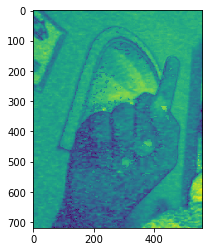

(64, 64)


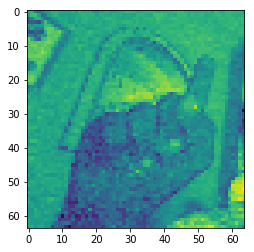

[[ 0.35686275  0.36470588  0.26666667 ...,  0.36078431  0.36470588
   0.35686275]
 [ 0.3254902   0.38039216  0.38431373 ...,  0.35686275  0.34901961
   0.36078431]
 [ 0.21176471  0.2745098   0.35294118 ...,  0.35294118  0.37254902
   0.37254902]
 ..., 
 [ 0.34509804  0.3254902   0.3254902  ...,  0.36470588  0.37254902
   0.37647059]
 [ 0.34117647  0.32156863  0.3254902  ...,  0.43137255  0.37647059
   0.36078431]
 [ 0.34117647  0.35294118  0.31372549 ...,  0.37647059  0.33333333
   0.29019608]]
(719, 435)


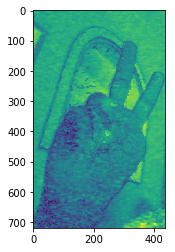

(64, 64)


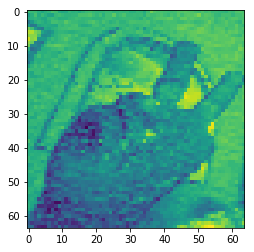

[[ 0.35686275  0.35294118  0.35294118 ...,  0.36862745  0.37254902
   0.36470588]
 [ 0.30980392  0.3372549   0.36470588 ...,  0.36078431  0.36078431
   0.36862745]
 [ 0.32941176  0.3372549   0.34509804 ...,  0.37254902  0.36078431
   0.36470588]
 ..., 
 [ 0.23137255  0.22745098  0.19215686 ...,  0.31372549  0.32156863
   0.36470588]
 [ 0.20784314  0.16078431  0.18039216 ...,  0.30980392  0.34509804
   0.40784314]
 [ 0.23137255  0.23137255  0.16078431 ...,  0.31372549  0.32156863
   0.34509804]]
(719, 555)


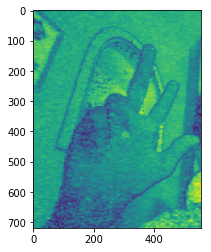

(64, 64)


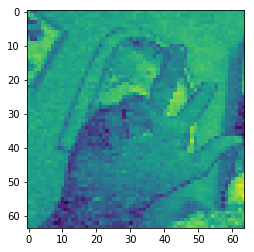

[[ 0.39215686  0.25882353  0.22745098 ...,  0.37254902  0.35686275
   0.36078431]
 [ 0.39607843  0.38823529  0.31372549 ...,  0.35686275  0.37254902
   0.34509804]
 [ 0.24705882  0.37254902  0.39215686 ...,  0.36862745  0.37254902
   0.36862745]
 ..., 
 [ 0.32156863  0.31372549  0.32156863 ...,  0.39607843  0.39215686
   0.39607843]
 [ 0.30196078  0.3254902   0.30980392 ...,  0.44313725  0.4         0.34901961]
 [ 0.32156863  0.31372549  0.3254902  ...,  0.36078431  0.34509804
   0.30196078]]
(715, 536)


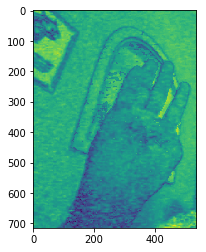

(64, 64)


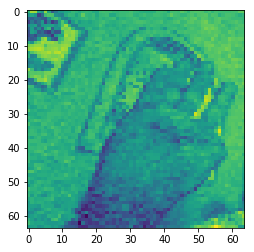

[[ 0.35294118  0.42745098  0.42352941 ...,  0.36470588  0.38431373
   0.38431373]
 [ 0.29803922  0.3254902   0.29803922 ...,  0.35294118  0.3372549
   0.34901961]
 [ 0.22352941  0.21960784  0.24313725 ...,  0.35686275  0.35686275
   0.35294118]
 ..., 
 [ 0.34509804  0.31764706  0.28627451 ...,  0.36078431  0.35686275
   0.38431373]
 [ 0.36078431  0.32941176  0.31764706 ...,  0.34117647  0.36470588
   0.39215686]
 [ 0.30980392  0.31372549  0.32156863 ...,  0.38431373  0.30980392
   0.31372549]]
(719, 623)


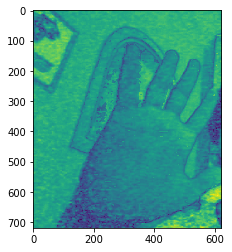

(64, 64)


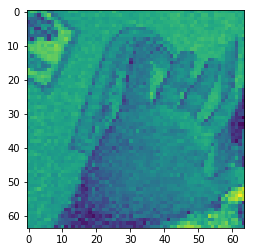

[[ 0.36862745  0.42352941  0.40784314 ...,  0.38039216  0.36470588
   0.36470588]
 [ 0.34117647  0.3372549   0.25490196 ...,  0.37254902  0.38431373
   0.36078431]
 [ 0.27058824  0.24705882  0.24705882 ...,  0.38823529  0.37254902
   0.36470588]
 ..., 
 [ 0.37254902  0.34509804  0.35294118 ...,  0.43529412  0.28627451
   0.20784314]
 [ 0.36078431  0.34509804  0.33333333 ...,  0.41960784  0.35686275
   0.16078431]
 [ 0.34117647  0.3372549   0.36862745 ...,  0.34901961  0.3254902
   0.30196078]]
(719, 511)


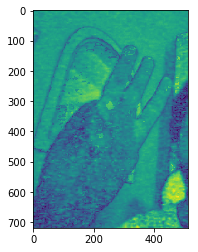

(64, 64)


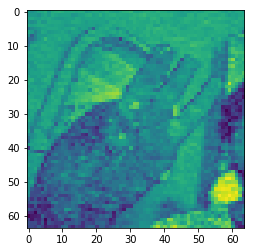

[[ 0.33333333  0.31764706  0.33333333 ...,  0.35686275  0.36078431
   0.34117647]
 [ 0.3254902   0.33333333  0.32941176 ...,  0.34117647  0.35294118
   0.35686275]
 [ 0.34509804  0.35686275  0.34509804 ...,  0.34509804  0.36470588
   0.36470588]
 ..., 
 [ 0.17647059  0.11764706  0.16078431 ...,  0.23137255  0.29803922
   0.21960784]
 [ 0.20392157  0.19215686  0.2        ...,  0.14901961  0.15294118
   0.21960784]
 [ 0.19215686  0.19215686  0.17647059 ...,  0.18039216  0.1254902
   0.12941176]]
(719, 425)


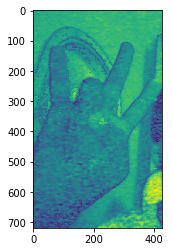

(64, 64)


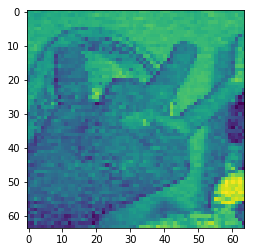

[[ 0.34901961  0.34901961  0.36470588 ...,  0.36862745  0.36862745
   0.36862745]
 [ 0.35686275  0.34509804  0.32941176 ...,  0.39215686  0.36470588
   0.36078431]
 [ 0.34117647  0.35294118  0.3372549  ...,  0.37647059  0.38431373
   0.36862745]
 ..., 
 [ 0.23921569  0.21176471  0.26666667 ...,  0.38823529  0.21176471
   0.25098039]
 [ 0.15686275  0.14509804  0.25882353 ...,  0.38823529  0.36470588
   0.15294118]
 [ 0.16078431  0.16078431  0.18039216 ...,  0.31764706  0.35686275
   0.2627451 ]]
(719, 609)


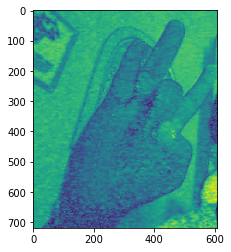

(64, 64)


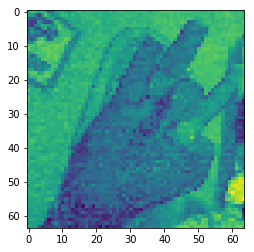

[[ 0.32941176  0.37254902  0.36470588 ...,  0.36470588  0.36470588
   0.35686275]
 [ 0.3254902   0.32156863  0.27058824 ...,  0.36862745  0.38039216
   0.36862745]
 [ 0.24705882  0.20392157  0.20784314 ...,  0.36862745  0.36862745
   0.35686275]
 ..., 
 [ 0.3372549   0.3372549   0.3372549  ...,  0.3372549   0.31764706
   0.2627451 ]
 [ 0.31764706  0.3254902   0.31372549 ...,  0.38823529  0.37254902
   0.38431373]
 [ 0.34117647  0.3254902   0.3372549  ...,  0.40392157  0.41960784
   0.38039216]]
(717, 566)


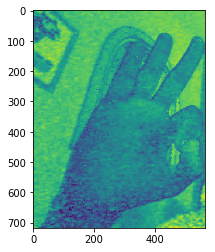

(64, 64)


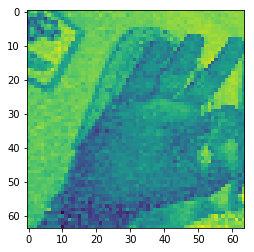

[[ 0.29019608  0.36078431  0.38823529 ...,  0.37647059  0.38039216
   0.38431373]
 [ 0.31372549  0.31372549  0.3254902  ...,  0.39607843  0.38823529
   0.38039216]
 [ 0.22352941  0.19215686  0.2        ...,  0.38039216  0.38431373
   0.38431373]
 ..., 
 [ 0.36078431  0.34901961  0.32156863 ...,  0.43921569  0.32941176
   0.41176471]
 [ 0.36078431  0.33333333  0.3254902  ...,  0.39215686  0.4         0.37647059]
 [ 0.3372549   0.30588235  0.3254902  ...,  0.36078431  0.36862745
   0.38431373]]
(10, 64, 64, 1)
[[[ 0.56470588]
  [ 0.56078431]
  [ 0.58823529]
  ..., 
  [ 0.54509804]
  [ 0.54509804]
  [ 0.54117647]]

 [[ 0.57254902]
  [ 0.57647059]
  [ 0.58823529]
  ..., 
  [ 0.54901961]
  [ 0.50196078]
  [ 0.5372549 ]]

 [[ 0.57647059]
  [ 0.59215686]
  [ 0.56862745]
  ..., 
  [ 0.46666667]
  [ 0.4627451 ]
  [ 0.45098039]]

 ..., 
 [[ 0.56078431]
  [ 0.56078431]
  [ 0.57647059]
  ..., 
  [ 0.49019608]
  [ 0.44313725]
  [ 0.51372549]]

 [[ 0.59607843]
  [ 0.58039216]
  [ 0.57647059]
  ..., 

In [19]:
image = cv2.imread('img/{}.jpg'.format(1))
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

gray_image = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)
plt.imshow(hsv)
plt.show()
plt.imshow(gray_image)
plt.show()



res = np.zeros((10,64,64,1),dtype = 'float')
for i in range(10):

    image = cv2.imread('img/{}.jpg'.format(i))
    #hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('img/{}_gray.jpg'.format(i),gray_image)

    print(gray_image.shape)

    plt.imshow(gray_image)
    plt.show()

    resized_image = cv2.resize(gray_image, (64, 64)) 

    print(resized_image.shape)
    plt.imshow(resized_image)
    plt.show()

    resized_image = np.asarray(resized_image,dtype = 'float')/255.

    print(resized_image)
    resized_image = resized_image.reshape(resized_image.shape[0],resized_image.shape[1],1)
    res[i] = resized_image


print(res.shape)

print(res[0])
pre = model.predict(x = res)

print(pre)
print(np.argmax(pre,axis = 1))

